In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

import tensorflow as tf
import keras

In [3]:
model = keras.models.load_model('/content/new_model_scipy_spec.h5')

In [4]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 127, 69, 16)       160       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 63, 34, 16)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 63, 34, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 32, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 30, 16, 32)       

#Data

In [ ]:
!gdown https://drive.google.com/uc?id=1GTl5Myv9Ii1xAOdC49Gs3C1N_MiJFsrH

Downloading...
From: https://drive.google.com/uc?id=1GTl5Myv9Ii1xAOdC49Gs3C1N_MiJFsrH
To: /content/data/3.wav
100% 32.0k/32.0k [00:00<00:00, 68.3MB/s]


In [ ]:
!gdown  https://drive.google.com/uc?id=10b4bairZx4BPO3o1LYK_yy-Nr-iKK5Ua

Downloading...
From: https://drive.google.com/uc?id=10b4bairZx4BPO3o1LYK_yy-Nr-iKK5Ua
To: /content/data/archive.zip
100% 1.90G/1.90G [00:25<00:00, 73.4MB/s]


In [ ]:
%cd /content
!mkdir data
%cd data

!unzip /content/archive.zip

/content
mkdir: cannot create directory ‘data’: File exists
/content/data
Archive:  /content/archive.zip
replace augmented_dataset/augmented_dataset/bed/1001.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
AN


In [ ]:
sample_rate, sample = wavfile.read('/content/data/augmented_dataset_verynoisy/augmented_dataset_verynoisy/go/1002.wav')
sample = sample

In [ ]:
print(sample.shape)
print(sample_rate)

(16000,)
16000


Text(0, 0.5, 'energy')

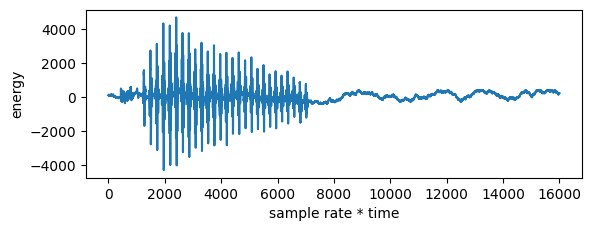

In [ ]:
plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(sample)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

In [ ]:
frequencies, times, spectrogram = signal.spectrogram(sample, sample_rate, return_onesided=True)
print(frequencies.shape)
print(times.shape)
print(spectrogram.shape)

(129,)
(71,)
(129, 71)


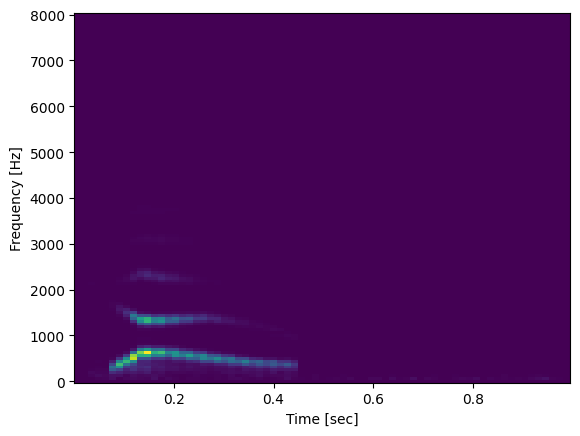

In [ ]:
plt.pcolormesh(times, frequencies, spectrogram)
#plt.imshow(spectrogram, cmap='gray')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
print(spectrogram.shape)
print(np.min(spectrogram))
print(np.max(spectrogram))

(129, 71)
5.813117e-09
4349.404


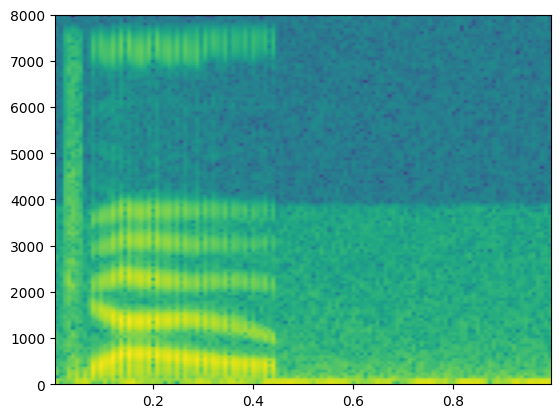

In [ ]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(sample, Fs=sample_rate)
plt.show()

In [ ]:
powerSpectrum.shape

(129, 124)

#Data Loader

In [ ]:
path = '/content/data/augmented_dataset/augmented_dataset'
data_path = []
label = []
code = dict()
value = 0

# read not noise dataset
for folder in os.listdir(path):
  code[folder] = value
  value += 1

  for file_wav in os.listdir(path + '/' + folder):
    data_path.append(path + '/' + folder + '/' + file_wav)
    label.append(folder)

path = '/content/data/augmented_dataset_verynoisy/augmented_dataset_verynoisy'

for folder in os.listdir(path):
  for file_wav in os.listdir(path + '/' + folder):
    data_path.append(path + '/' + folder + '/' + file_wav)
    label.append(folder)

data_path = np.asarray(data_path)
label = np.asarray(label)

In [ ]:
print(data_path.shape)
print(label[0])
print(label.shape)
print(code)

(83698,)
yes
(83698,)
{'yes': 0, 'on': 1, 'seven': 2, 'stop': 3, 'no': 4, 'wow': 5, 'tree': 6, 'marvel': 7, 'bed': 8, 'four': 9, 'bird': 10, 'up': 11, 'happy': 12, 'off': 13, 'zero': 14, 'sheila': 15, 'dog': 16, 'three': 17, 'cat': 18, 'six': 19, 'go': 20, 'down': 21, 'eight': 22, 'five': 23, 'right': 24, 'left': 25, 'house': 26, 'one': 27, 'two': 28, 'nine': 29}


In [ ]:
label = np.asarray([code[x] for x in label])
print(label[0])
print(label.shape)

0
(83698,)


In [ ]:
def convert_path_to_spec(path):
  sample_rate, sample = wavfile.read(path)
  #frequencies, times, spectrogram = signal.spectrogram(sample, sample_rate, return_onesided=True)
  powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(sample, Fs=sample_rate)

  return powerSpectrum

## Split train test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_, Y_train, Y_ = train_test_split(data_path, label, test_size=0.2)
X_test, X_val, Y_test, Y_val = train_test_split(X_, Y_, test_size = 0.5)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(66958,)
(8370,)
(8370,)
(66958,)
(8370,)
(8370,)


#Build model

In [ ]:
num_class = len(code)
model=keras.Sequential()

model.add(keras.layers.InputLayer(input_shape=(129, 124, 1)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(.25))

model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(.25))

model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(.25))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(.25))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(.25))
model.add(keras.layers.Dense(num_class, activation='softmax'))

model.summary()

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01),
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = keras.metrics.SparseCategoricalAccuracy())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 122, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 61, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 61, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 59, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 29, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 29, 32)        0

In [ ]:
import time

def train_model(model, X_train, Y_train, X_val, Y_val, epoch, batch_size):

  history_epoch = []

  #read file val
  data_val = []
  for path in X_val:
    data_val.append(convert_path_to_spec(path))
  data_val = np.asarray(data_val)

  for i in range(epoch):
    start = 0
    time_start = time.time()

    while start <= len(X_train):
      X_batch = X_train[start: min(start + batch_size, len(X_train))]
      Y_batch = Y_train[start: min(start + batch_size, len(Y_train))]
      start += batch_size

      #read file train
      data_train = []
      for path in X_batch:
        data_train.append(convert_path_to_spec(path))

      data_train = np.asarray(data_train)

      #train model
      history = model.fit(data_train, Y_batch, epochs=1, batch_size=batch_size, verbose=1)

    time_end = time.time()

    print('Epoch {}/{}: '.format(i+1, epoch))
    print('Time is: {} s'.format(time_end-time_start))
    # print(history.history)
    print('Train Loss is: ', history.history['loss'][0], ' --- Train Accuracy is: ', history.history['sparse_categorical_accuracy'][0])

    loss, acc = model.evaluate(data_val, Y_val, batch_size=batch_size, verbose=0)
    print('Val Loss is: ', loss, ' --- Val Accuracy is: ', acc)
    print()

    # train loss, train acc, val loss, val acc
    history_epoch.append([history.history['loss'], history.history['sparse_categorical_accuracy'], loss, acc])



In [ ]:
train_model(model, X_train, Y_train, X_val, Y_val, epoch=30, batch_size=256)

1/1 [==============================] - 0s 105ms/step - loss: 3.3687 - sparse_categorical_accuracy: 0.0508


In [ ]:
# save model
# keras.saving.save_model(model, '/content/new_model')
model.save('/content/new_model_plt_spec.h5')